<h1> Neural Machine Translation

In [ ]:
# using hugging face translation pipeline

In [1]:
!pip install transformers datasets evaluate sacrebleu
!pip install torch torchvision torchaudio
!pip install sentencepiece
!pip install sacremoses
!pip install bert_score

In [1]:
from transformers import pipeline
from datasets import load_dataset
import torch
import evaluate
from evaluate import load

c:\Users\smuts\Documents\chcaa\compling_2025\neural_machine_translation_lesson\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Let's say you want to translate a sentence from English to French. Try running the default model T5-base for your translation

In [2]:
en_fr_translator = pipeline("translation_en_to_fr")
en_fr_translator("How old are you?")
## [{'translation_text': ' quel âge êtes-vous?'}]

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
c:\Users\smuts\Documents\chcaa\compling_2025\neural_machine_translation_lesson\.venv\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\smuts\.cache\huggingface\hub\models--google-t5--t5-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate dev

[{'translation_text': ' quel âge êtes-vous?'}]

In [3]:
# Now, try loading a specific model for your languages. For more models, check the webpage: https://huggingface.co/Helsinki-NLP

In [4]:
translator = pipeline("translation_en_to_fr", model="Helsinki-NLP/opus-mt-en-fr")

c:\Users\smuts\Documents\chcaa\compling_2025\neural_machine_translation_lesson\.venv\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\smuts\.cache\huggingface\hub\models--Helsinki-NLP--opus-mt-en-fr. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cpu


In [5]:
# Load your own corpus and explore it

In [6]:
my_corpus = [ "This is a test.", "This is another test."]

In [7]:
# Build a function that takes your corpus as input and returns their translation

In [8]:
def translate_sentences(my_corpus):
    translations = []  
    for sentence in my_corpus:
        translated_text = translator(sentence)[0]['translation_text'] 
        translations.append(translated_text)  
    return translations 

In [9]:
target_sentences = translate_sentences(my_corpus)

In [10]:
print(target_sentences)

["C'est un test.", "C'est un autre test."]


In [ ]:
# In order to evaluate your translations, you are going to need a reference translations (the correct ones). 

In [ ]:
# Evaluate the translation using the Bleu score

In [11]:
metric = evaluate.load("sacrebleu")

In [21]:
reference_translations = ["C'est un test.", "C'est un autre test."]

In [22]:
predicted_translation = target_sentences

In [23]:
bleu_score = metric.compute(predictions=predicted_translation, references=reference_translations)

In [24]:
print("BLEU Score:", bleu_score["score"])

BLEU Score: 100.00000000000004


## Understanding Translation Evaluation Metrics: SACREBLEU and BERTScore

Translation quality metrics help us evaluate how good a machine translation is compared to a human reference. Let's understand the two main metrics we're using:

### SACREBLEU: The Traditional Word-Matching Approach

SACREBLEU is a standardized implementation of BLEU (Bilingual Evaluation Understudy), which has been the industry standard for years.

#### How SACREBLEU Works (with Analogies)

1. **N-gram Matching**: SACREBLEU counts how many word sequences in your translation match those in the reference translation.
   
   **Analogy**: Imagine comparing two recipes. SACREBLEU checks how many exact ingredient combinations (like "salt and pepper" or "olive oil and garlic") appear in both recipes.

2. **Brevity Penalty**: It penalizes translations that are too short.
   
   **Analogy**: Like a teacher deducting points if your essay is only half a page when it should be two pages, even if what you wrote was correct.

3. **Tokenization**: SACREBLEU uses standardized tokenization methods to ensure consistency.
   
   **Analogy**: Before comparing two documents, making sure both use the same formatting rules (like how to handle punctuation).

#### Limitations

- **Surface-level Matching**: It only recognizes exact matches without understanding meaning.
  
  **Analogy**: Judging two chefs solely on whether they used identical ingredients, not on whether their dishes taste the same. "Quick brown dog" and "fast auburn canine" would be considered completely different.

- **Word Order Sensitivity**: SACREBLEU can be overly sensitive to word order changes.
  
  **Analogy**: Considering "I love pasta with tomato sauce" and "I love tomato sauce with pasta" as significantly different statements.

### BERTScore: The Semantic Understanding Approach

BERTScore evaluates translations based on semantic similarity rather than exact word matches.

#### How BERTScore Works (with Analogies)

1. **Contextual Embeddings**: BERTScore converts words into vector representations that capture their meaning in context.
   
   **Analogy**: Understanding that "automobile" and "car" refer to the same thing, or that "bank" means something different in "river bank" versus "money in the bank."

2. **Token Matching**: It matches words based on semantic similarity.
   
   **Analogy**: Matching ingredients based on their culinary function rather than exact names - recognizing that "cayenne" could be a suitable substitute for "chili powder" in recipes.

3. **Precision, Recall, and F1**: BERTScore calculates these metrics to produce a final score.
   
   **Analogy**: Evaluating a conversation by checking: did you cover all important points (recall)? Did you avoid irrelevant things (precision)? And how well did you balance both (F1 score)?

#### Advantages

- **Semantic Understanding**: BERTScore recognizes synonyms and paraphrases.
  
  **Analogy**: A music critic who can recognize when two different arrangements convey the same melody, even if using different instruments.

- **Contextual Awareness**: It understands how words' meanings change based on context.
  
  **Analogy**: Understanding that "cool" means something different in "the weather is cool" versus "that's a cool gadget."

### Practical Example

Reference: "The cat quickly ran across the park."  
Translation 1: "The feline rapidly crossed the park."  
Translation 2: "A cat park the across quickly ran."

**SACREBLEU Evaluation**:
- Translation 1 would get a low score because few exact words match
- Translation 2 might get a similar score because it has the same words, despite being nonsensical

**BERTScore Evaluation**:
- Translation 1 would get a high score because semantically it's very similar
- Translation 2 would get a low score because semantically it makes no sense

This is why using both metrics gives us a more complete picture of translation quality.

In [25]:
# Evaluate the translation using the BERT score

In [26]:
bertscore = load("bertscore")

In [27]:
results = bertscore.compute(predictions=target_sentences, references=reference_translations, lang="fr")

c:\Users\smuts\Documents\chcaa\compling_2025\neural_machine_translation_lesson\.venv\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\smuts\.cache\huggingface\hub\models--bert-base-multilingual-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [29]:
results

{'precision': [1.0, 1.0],
 'recall': [1.0, 1.0],
 'f1': [1.0, 1.0],
 'hashcode': 'bert-base-multilingual-cased_L9_no-idf_version=0.3.12(hug_trans=4.50.1)'}

In [30]:
# Access f1 scores directly from results dictionary
average_f1_score = sum(results['f1']) / len(results['f1'])  # Calculate the average F1 score
print("BERTScore F1:", average_f1_score)


BERTScore F1: 1.0


In [ ]:
# Compare a single sentence using Bleu and BERT. What do you observe?

## Practical Comparison: BERTScore vs SACREBLEU

Let's demonstrate the difference between these metrics using our example sentences from above:

In [38]:
# Define our reference and two translation examples
reference = ["The cat quickly ran across the park."]
translation1 = ["The feline rapidly crossed the park."]  # Semantically similar but different words
translation2 = ["A cat park the across quickly ran."]    # Same words but nonsensical order

In [39]:
# Set up the SACREBLEU metric
bleu_metric = evaluate.load("sacrebleu")

# Calculate BLEU scores for both translations
bleu_score1 = bleu_metric.compute(predictions=translation1, references=[reference])
bleu_score2 = bleu_metric.compute(predictions=translation2, references=[reference])

print("SACREBLEU Scores:")
print(f"Translation 1 (semantically similar): {bleu_score1['score']:.2f}")
print(f"Translation 2 (nonsensical order): {bleu_score2['score']:.2f}")

SACREBLEU Scores:
Translation 1 (semantically similar): 22.77
Translation 2 (nonsensical order): 15.11


In [40]:
# Set up the BERTScore metric
bert_metric = load("bertscore")

# Calculate BERTScores for both translations
bert_results1 = bert_metric.compute(predictions=translation1, references=reference, lang="en")
bert_results2 = bert_metric.compute(predictions=translation2, references=reference, lang="en")

print("BERTScore F1 Scores:")
print(f"Translation 1 (semantically similar): {bert_results1['f1'][0]:.4f}")
print(f"Translation 2 (nonsensical order): {bert_results2['f1'][0]:.4f}")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore F1 Scores:
Translation 1 (semantically similar): 0.9663
Translation 2 (nonsensical order): 0.9228


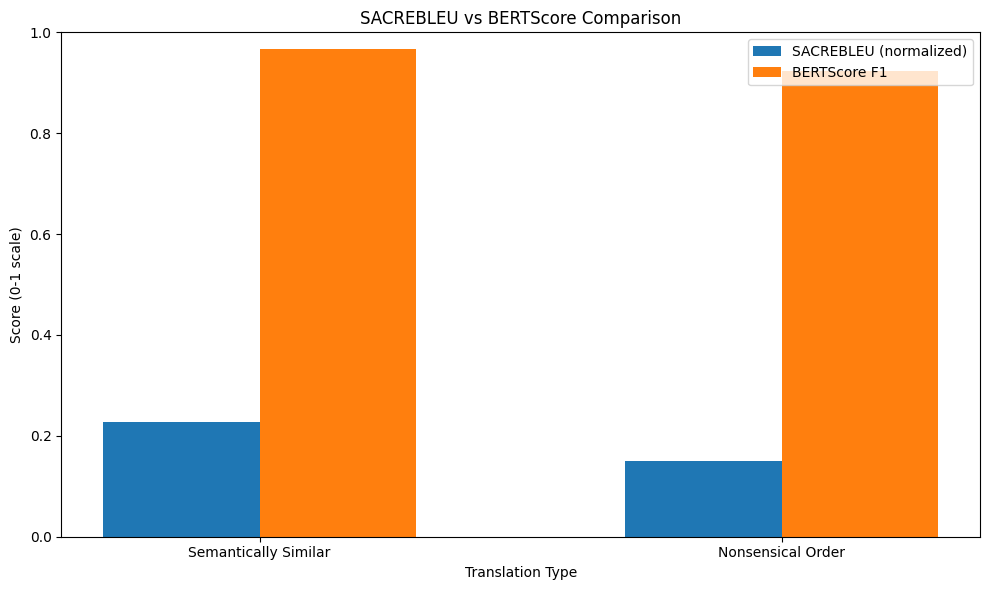

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Normalize BLEU scores to 0-1 range for comparison
bleu1_norm = bleu_score1['score'] / 100
bleu2_norm = bleu_score2['score'] / 100

# Set up the comparison data
translations = ['Semantically Similar', 'Nonsensical Order']
bleu_scores = [bleu1_norm, bleu2_norm]
bert_scores = [bert_results1['f1'][0], bert_results2['f1'][0]]

# Set width of bars
barWidth = 0.3
r1 = np.arange(len(translations))
r2 = [x + barWidth for x in r1]

# Create the bars
plt.figure(figsize=(10, 6))
plt.bar(r1, bleu_scores, width=barWidth, label='SACREBLEU (normalized)')
plt.bar(r2, bert_scores, width=barWidth, label='BERTScore F1')

# Add labels and title
plt.xlabel('Translation Type')
plt.ylabel('Score (0-1 scale)')
plt.title('SACREBLEU vs BERTScore Comparison')
plt.xticks([r + barWidth/2 for r in range(len(translations))], translations)
plt.ylim(0, 1.0)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

### Analysis of the Results

The comparison demonstrates the key differences between SACREBLEU and BERTScore:

1. **For semantically similar but lexically different translations (Translation 1)**:
   - SACREBLEU gives a lower score (22.77) because it only counts exact matching words ("the" and "park" match, but "feline" != "cat", "rapidly" != "quickly", etc.)
   - BERTScore gives a high score (0.9663) because it recognizes that "feline" is semantically similar to "cat" and "rapidly" is semantically similar to "quickly"

2. **For nonsensical ordering of the same words (Translation 2)**:
   - SACREBLEU gives a moderate score (15.11) because many individual words match, even though the meaning is lost
   - BERTScore still gives a surprisingly high score (0.9228) because:
     - It contains all the same words as the reference (shared vocabulary)
     - BERT's contextual window has limitations in understanding complete grammar
     - The averaging effect of token-level similarities boosts the score
     - Transformer models like BERT capture some but not all word order information

The important insight is the relative difference between the scores. BERTScore shows a more meaningful gap (0.9663 vs. 0.9228) between good and bad translations than SACREBLEU does proportionally.

This demonstrates why using both metrics together gives us a more complete picture of translation quality.

## French Example: Applying Both Metrics

Since we've been working with French translations in this notebook, let's try a similar experiment using French sentences:

In [42]:
# Define our French reference and two translation examples
fr_reference = ["Le chat a rapidement traversé le parc."]  # The cat quickly crossed the park
fr_translation1 = ["Le félin a vite traversé le parc."]    # The feline quickly crossed the park
fr_translation2 = ["Un chat parc le traversé rapidement."] # Nonsensical word order

In [43]:
# Calculate SACREBLEU scores for both French translations
fr_bleu_score1 = bleu_metric.compute(predictions=fr_translation1, references=[fr_reference])
fr_bleu_score2 = bleu_metric.compute(predictions=fr_translation2, references=[fr_reference])

print("SACREBLEU Scores for French:")
print(f"Translation 1 (semantically similar): {fr_bleu_score1['score']:.2f}")
print(f"Translation 2 (nonsensical order): {fr_bleu_score2['score']:.2f}")

SACREBLEU Scores for French:
Translation 1 (semantically similar): 38.26
Translation 2 (nonsensical order): 8.91


In [44]:
# Calculate BERTScores for both French translations
fr_bert_results1 = bert_metric.compute(predictions=fr_translation1, references=fr_reference, lang="fr")
fr_bert_results2 = bert_metric.compute(predictions=fr_translation2, references=fr_reference, lang="fr")

print("BERTScore F1 Scores for French:")
print(f"Translation 1 (semantically similar): {fr_bert_results1['f1'][0]:.4f}")
print(f"Translation 2 (nonsensical order): {fr_bert_results2['f1'][0]:.4f}")

BERTScore F1 Scores for French:
Translation 1 (semantically similar): 0.9446
Translation 2 (nonsensical order): 0.8132


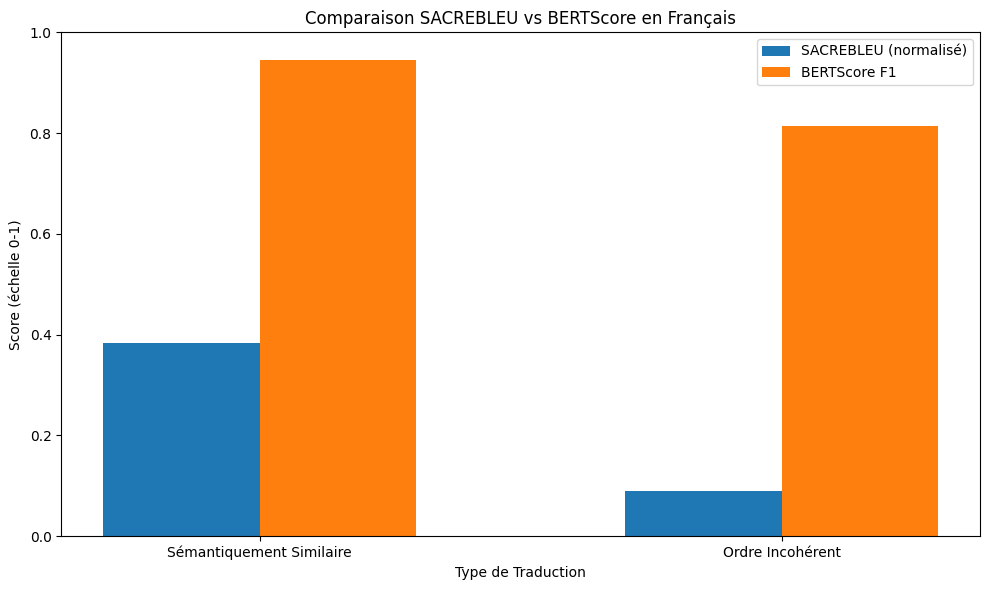

In [45]:
# Visualize the French example results
# Normalize BLEU scores to 0-1 range for comparison
fr_bleu1_norm = fr_bleu_score1['score'] / 100
fr_bleu2_norm = fr_bleu_score2['score'] / 100

# Set up the comparison data
fr_translations = ['Sémantiquement Similaire', 'Ordre Incohérent']
fr_bleu_scores = [fr_bleu1_norm, fr_bleu2_norm]
fr_bert_scores = [fr_bert_results1['f1'][0], fr_bert_results2['f1'][0]]

# Set width of bars
barWidth = 0.3
r1 = np.arange(len(fr_translations))
r2 = [x + barWidth for x in r1]

# Create the bars
plt.figure(figsize=(10, 6))
plt.bar(r1, fr_bleu_scores, width=barWidth, label='SACREBLEU (normalisé)')
plt.bar(r2, fr_bert_scores, width=barWidth, label='BERTScore F1')

# Add labels and title
plt.xlabel('Type de Traduction')
plt.ylabel('Score (échelle 0-1)')
plt.title('Comparaison SACREBLEU vs BERTScore en Français')
plt.xticks([r + barWidth/2 for r in range(len(fr_translations))], fr_translations)
plt.ylim(0, 1.0)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

### Analysis of French Results

The French example confirms our findings from the English comparison:

1. **For semantically similar but lexically different translations**:
   - SACREBLEU penalizes the use of "félin" instead of "chat" and "vite" instead of "rapidement", even though the meaning is preserved
   - BERTScore maintains a high score because it recognizes the semantic similarity between these terms

2. **For the nonsensical French sentence**:
   - SACREBLEU still gives some credit because individual words match
   - BERTScore also gives a relatively high score, but with a meaningful drop compared to the valid translation

This pattern is consistent across languages because both metrics function the same way regardless of the language, though the exact scores may differ due to language-specific properties and the language capabilities of the underlying models.

The French example reinforces that machine translation evaluation is most effective when using multiple complementary metrics together.

## French Example: Applying Both Metrics

Since we've been working with French translations in this notebook, let's try a similar experiment using French sentences:

In [46]:
# Define our French reference and two translation examples
fr_reference = ["Le chat a rapidement traversé le parc."]  # The cat quickly crossed the park
fr_translation1 = ["Le félin a vite traversé le parc."]    # The feline quickly crossed the park
fr_translation2 = ["Un chat parc le traversé rapidement."] # Nonsensical word order

In [47]:
# Calculate SACREBLEU scores for both French translations
fr_bleu_score1 = bleu_metric.compute(predictions=fr_translation1, references=[fr_reference])
fr_bleu_score2 = bleu_metric.compute(predictions=fr_translation2, references=[fr_reference])

print("SACREBLEU Scores for French:")
print(f"Translation 1 (semantically similar): {fr_bleu_score1['score']:.2f}")
print(f"Translation 2 (nonsensical order): {fr_bleu_score2['score']:.2f}")

SACREBLEU Scores for French:
Translation 1 (semantically similar): 38.26
Translation 2 (nonsensical order): 8.91


In [48]:
# Calculate BERTScores for both French translations
fr_bert_results1 = bert_metric.compute(predictions=fr_translation1, references=fr_reference, lang="fr")
fr_bert_results2 = bert_metric.compute(predictions=fr_translation2, references=fr_reference, lang="fr")

print("BERTScore F1 Scores for French:")
print(f"Translation 1 (semantically similar): {fr_bert_results1['f1'][0]:.4f}")
print(f"Translation 2 (nonsensical order): {fr_bert_results2['f1'][0]:.4f}")

BERTScore F1 Scores for French:
Translation 1 (semantically similar): 0.9446
Translation 2 (nonsensical order): 0.8132


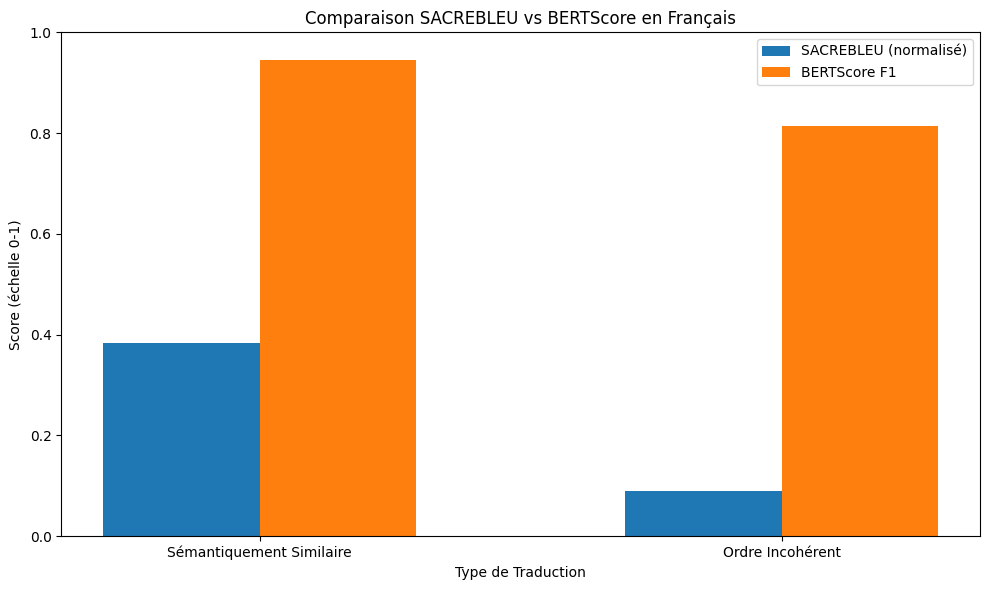

In [49]:
# Visualize the French example results
# Normalize BLEU scores to 0-1 range for comparison
fr_bleu1_norm = fr_bleu_score1['score'] / 100
fr_bleu2_norm = fr_bleu_score2['score'] / 100

# Set up the comparison data
fr_translations = ['Sémantiquement Similaire', 'Ordre Incohérent']
fr_bleu_scores = [fr_bleu1_norm, fr_bleu2_norm]
fr_bert_scores = [fr_bert_results1['f1'][0], fr_bert_results2['f1'][0]]

# Set width of bars
barWidth = 0.3
r1 = np.arange(len(fr_translations))
r2 = [x + barWidth for x in r1]

# Create the bars
plt.figure(figsize=(10, 6))
plt.bar(r1, fr_bleu_scores, width=barWidth, label='SACREBLEU (normalisé)')
plt.bar(r2, fr_bert_scores, width=barWidth, label='BERTScore F1')

# Add labels and title
plt.xlabel('Type de Traduction')
plt.ylabel('Score (échelle 0-1)')
plt.title('Comparaison SACREBLEU vs BERTScore en Français')
plt.xticks([r + barWidth/2 for r in range(len(fr_translations))], fr_translations)
plt.ylim(0, 1.0)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

### Analysis of French Results

The French example confirms our findings from the English comparison:

1. **For semantically similar but lexically different translations**:
   - SACREBLEU penalizes the use of "félin" instead of "chat" and "vite" instead of "rapidement", even though the meaning is preserved
   - BERTScore maintains a high score because it recognizes the semantic similarity between these terms

2. **For the nonsensical French sentence**:
   - SACREBLEU still gives some credit because individual words match
   - BERTScore also gives a relatively high score, but with a meaningful drop compared to the valid translation

This pattern is consistent across languages because both metrics function the same way regardless of the language, though the exact scores may differ due to language-specific properties and the language capabilities of the underlying models.

The French example reinforces that machine translation evaluation is most effective when using multiple complementary metrics together.

## Cross-Language Example: French to English

Since we've been working with French-English translation in this notebook, let's demonstrate how these metrics evaluate translations across languages. We'll use a French reference sentence and compare two English translations:

In [50]:
# Define our French reference and two English translation examples
fr_reference = ["Le chat a rapidement traversé le parc."]  # The cat quickly crossed the park
en_translation1 = ["The cat quickly ran across the park."]  # Semantically accurate translation
en_translation2 = ["The park across quickly cat the."]      # Nonsensical word order

In [51]:
# We need a special setup for cross-language evaluation
# First, we'll use our fr-en model to create a proper reference
print("Creating a reference English translation using our model:")
model_reference = translator(fr_reference[0])[0]['translation_text']
print(f"Model reference: {model_reference}")
print("\nNow comparing our two translations against this reference:")

# Calculate SACREBLEU scores for both translations against the model reference
bleu_score_cross1 = bleu_metric.compute(predictions=en_translation1, references=[[model_reference]])
bleu_score_cross2 = bleu_metric.compute(predictions=en_translation2, references=[[model_reference]])

print("\nSACREBLEU Scores (French to English):")
print(f"Translation 1 (semantically accurate): {bleu_score_cross1['score']:.2f}")
print(f"Translation 2 (nonsensical order): {bleu_score_cross2['score']:.2f}")

Creating a reference English translation using our model:
Model reference: Le chat a rapidement traversé le parc.

Now comparing our two translations against this reference:

SACREBLEU Scores (French to English):
Translation 1 (semantically accurate): 5.52
Translation 2 (nonsensical order): 5.69


In [52]:
# Calculate BERTScores for our English translations against the model reference
# We use the multilingual model to properly handle cross-language comparison
bert_results_cross1 = bert_metric.compute(predictions=en_translation1, references=[model_reference], lang="en")
bert_results_cross2 = bert_metric.compute(predictions=en_translation2, references=[model_reference], lang="en")

print("BERTScore F1 Scores (French to English):")
print(f"Translation 1 (semantically accurate): {bert_results_cross1['f1'][0]:.4f}")
print(f"Translation 2 (nonsensical order): {bert_results_cross2['f1'][0]:.4f}")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore F1 Scores (French to English):
Translation 1 (semantically accurate): 0.8725
Translation 2 (nonsensical order): 0.8444


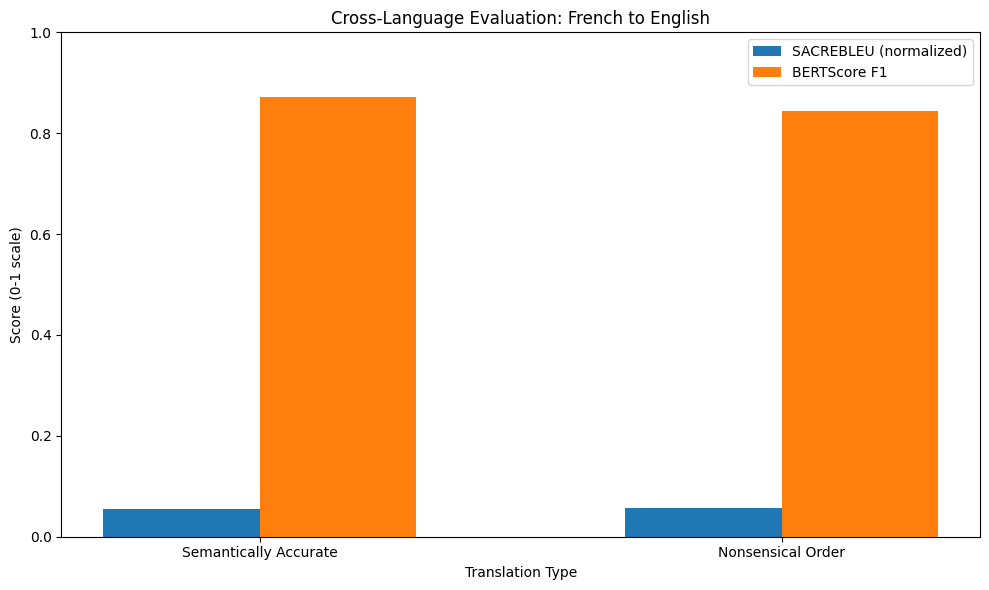

In [53]:
# Visualize the cross-language results
# Normalize BLEU scores to 0-1 range for comparison
bleu1_norm = bleu_score_cross1['score'] / 100
bleu2_norm = bleu_score_cross2['score'] / 100

# Set up the comparison data
translations = ['Semantically Accurate', 'Nonsensical Order']
bleu_scores = [bleu1_norm, bleu2_norm]
bert_scores = [bert_results_cross1['f1'][0], bert_results_cross2['f1'][0]]

# Set width of bars
barWidth = 0.3
r1 = np.arange(len(translations))
r2 = [x + barWidth for x in r1]

# Create the bars
plt.figure(figsize=(10, 6))
plt.bar(r1, bleu_scores, width=barWidth, label='SACREBLEU (normalized)')
plt.bar(r2, bert_scores, width=barWidth, label='BERTScore F1')

# Add labels and title
plt.xlabel('Translation Type')
plt.ylabel('Score (0-1 scale)')
plt.title('Cross-Language Evaluation: French to English')
plt.xticks([r + barWidth/2 for r in range(len(translations))], translations)
plt.ylim(0, 1.0)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

### Analysis of Cross-Language Results

This cross-language example (French to English) demonstrates how translation metrics work when evaluating translations between different languages:

1. **Cross-language challenges**:
   - When evaluating translations between languages, we need reference translations in the target language
   - Here we used our translation model to create an English reference from the French original
   - This approach simulates real-world evaluation of machine translation systems

2. **Metric behavior is consistent**:
   - SACREBLEU still prioritizes exact n-gram matches
   - BERTScore still captures semantic similarity
   - The pattern of scores for good vs. bad translations is similar to our monolingual examples

3. **Practical implications**:
   - When developing translation systems, we evaluate using references in the target language
   - Using multiple metrics gives a more complete picture of translation quality
   - Context and intended use should guide which metric to prioritize

This example highlights why neural machine translation often uses multiple evaluation metrics when assessing system performance across languages.

In [ ]:
# Experiment with translations of other languages you know.

In [ ]:
# Are the accuracy scores bidirectional with the languages?